In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

### Visualize Singlelayer LSTM peformance results

In [2]:
single_df = pd.read_csv(r"dataset\resultsSingle.csv")

In [3]:
single_df.head(2)

,Sequence_Length,Batch_Size,Hidden_Size,Num_Epochs,MSE,RMSE,R2,execution_time
0,7,32,10,50,12.829158,3.581781,0.891054,22.50302
1,7,32,10,100,8.400600,2.898379,0.928662,37.47155


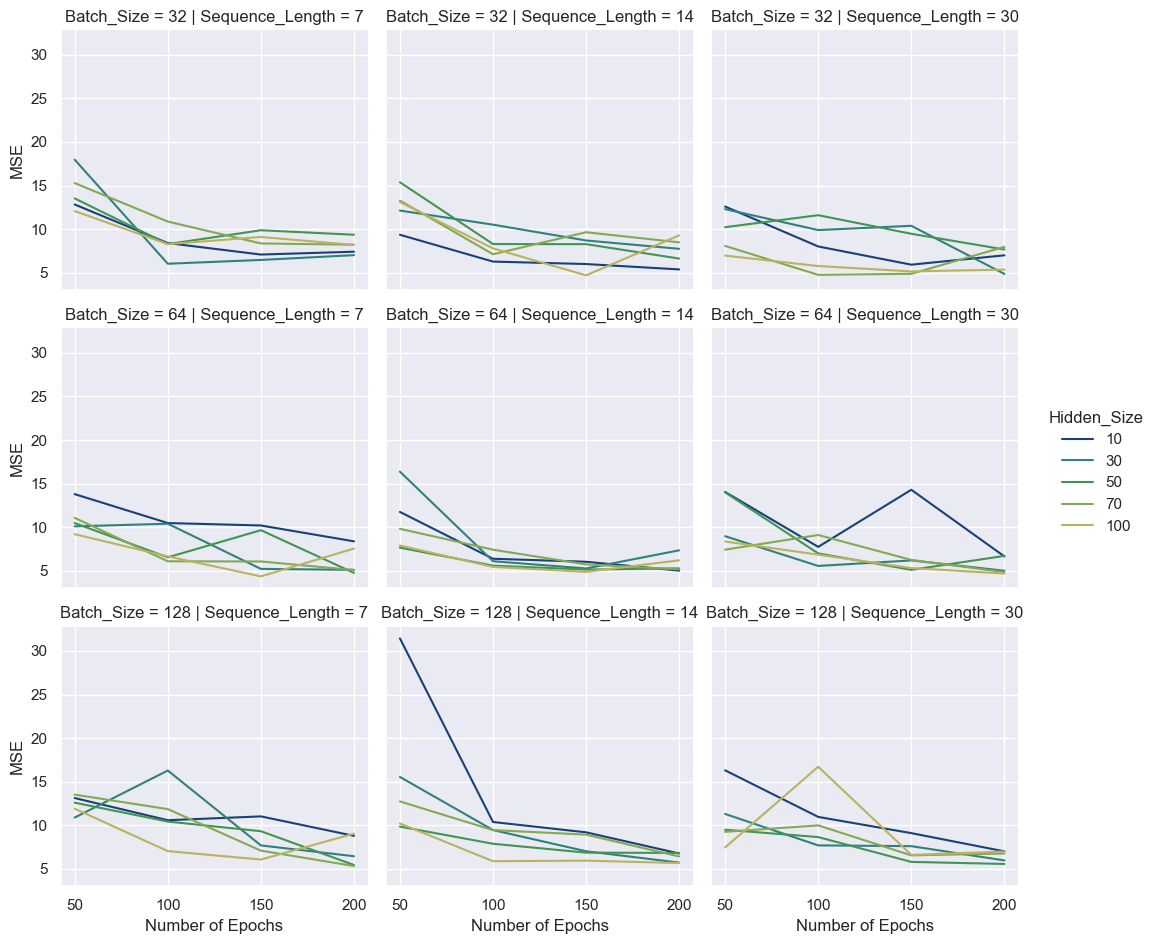

In [4]:
hue_pallete = sns.color_palette("gist_earth")
sns.set(font_scale= 1)
grid = sns.FacetGrid(single_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="MSE")
grid.set_axis_labels("Number of Epochs", "MSE")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\MSEsingle.png")

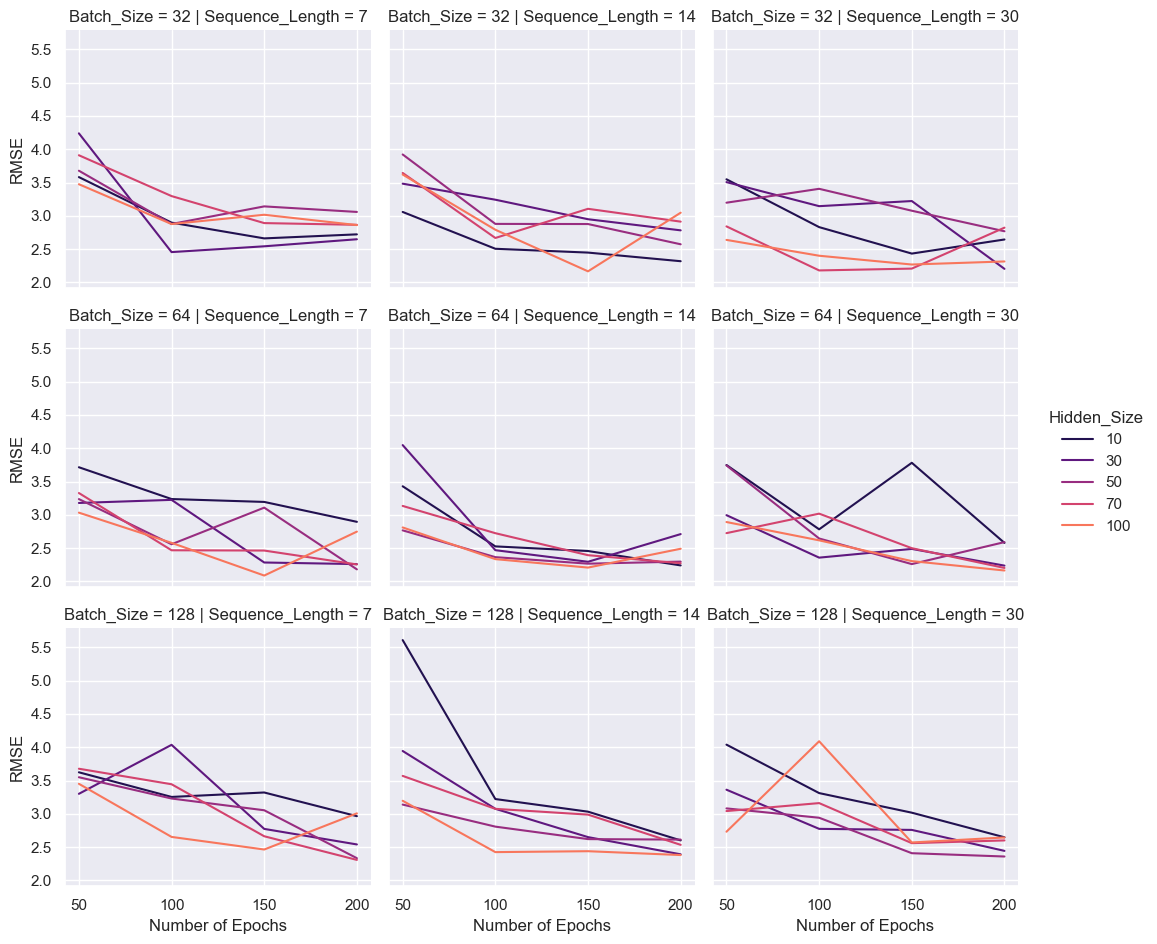

In [5]:
hue_pallete = sns.color_palette("magma")
sns.set(font_scale= 1)
grid = sns.FacetGrid(single_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="RMSE")
grid.set_axis_labels("Number of Epochs", "RMSE")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\RMSEsingle.png")

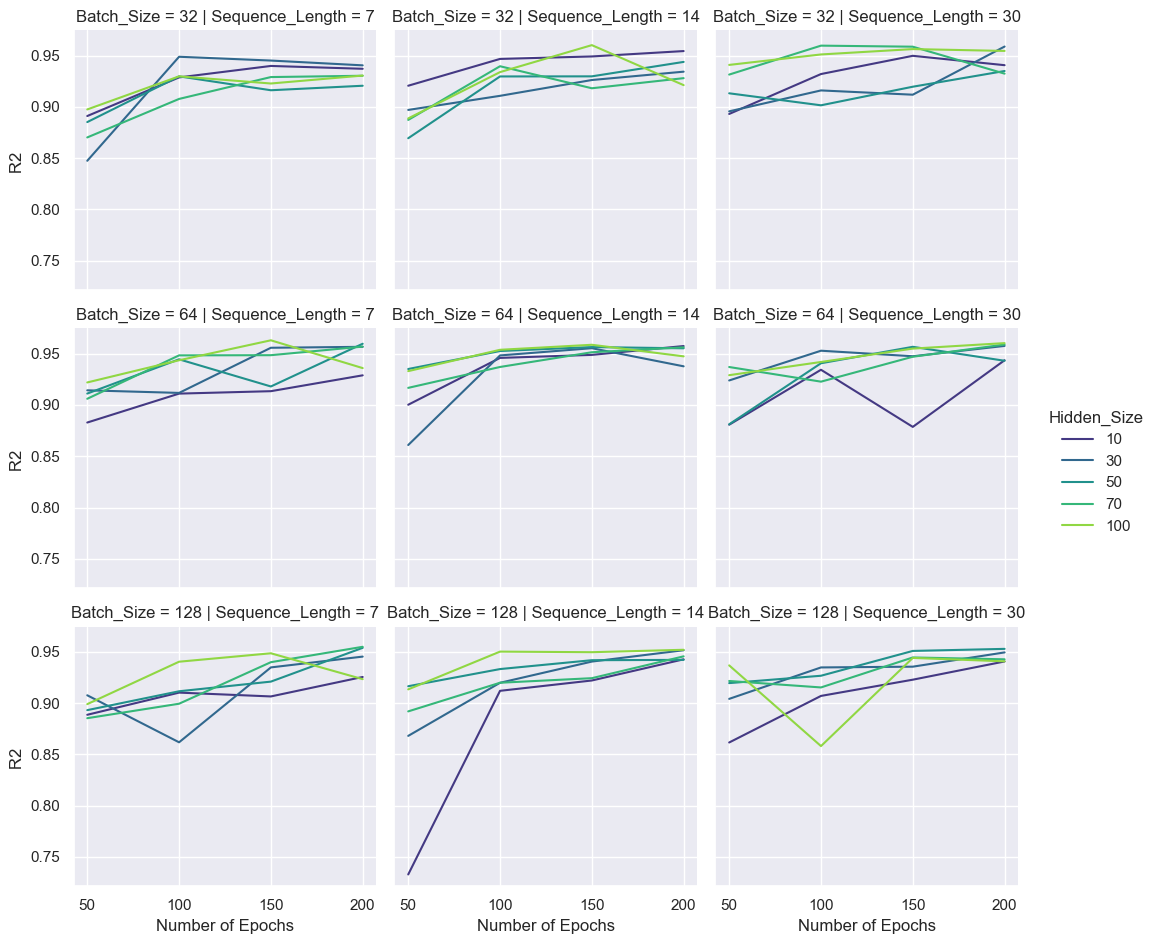

In [6]:
hue_pallete = sns.color_palette("viridis", 5)
sns.set(font_scale= 1)
grid = sns.FacetGrid(single_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="R2")
grid.set_axis_labels("Number of Epochs", "R2 ")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\R2single.png")

### Visualize Multilayer LSTM peformance results

In [7]:
multi_df = pd.read_csv(r"dataset\resultsMulti.csv")

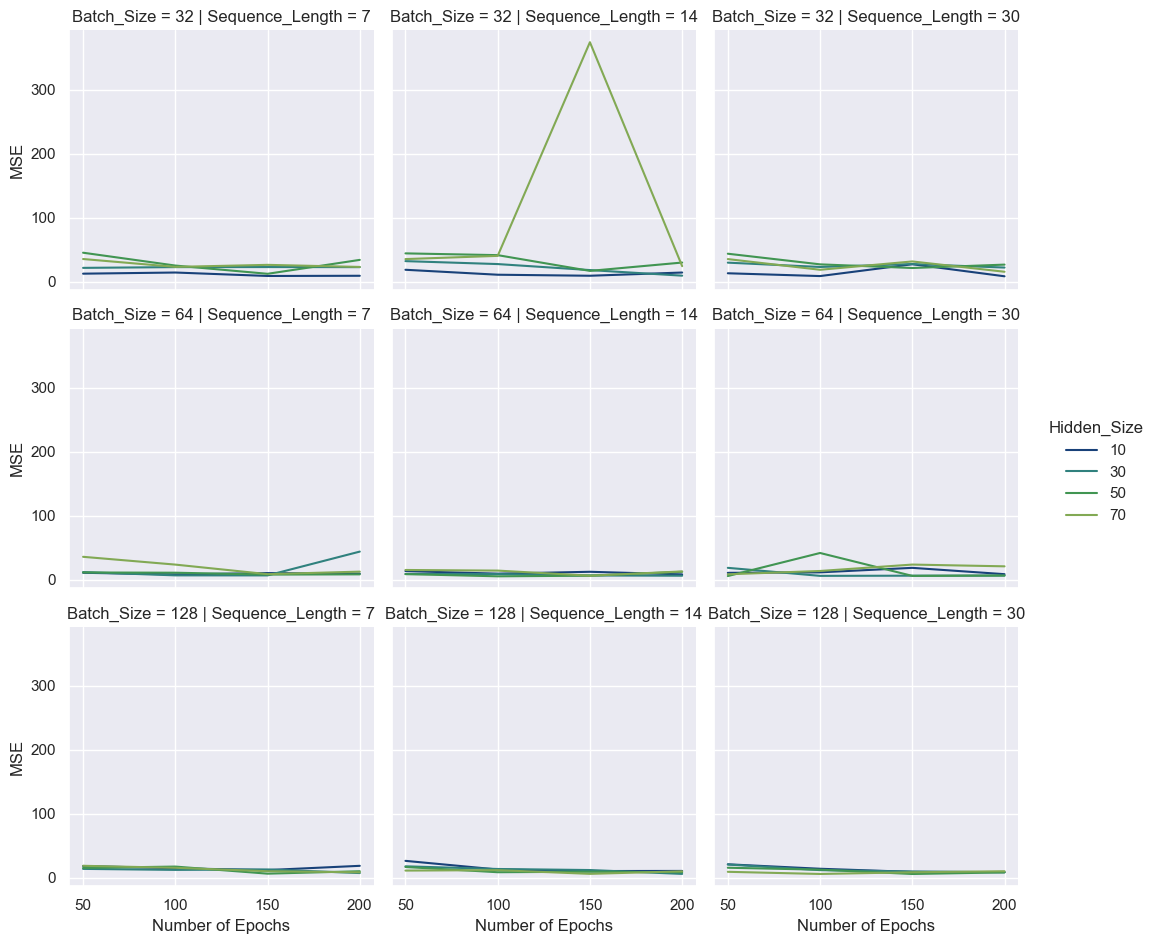

In [8]:
hue_pallete = sns.color_palette("gist_earth")
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="MSE")
grid.set_axis_labels("Number of Epochs", "MSE")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\MSEmulti.png")

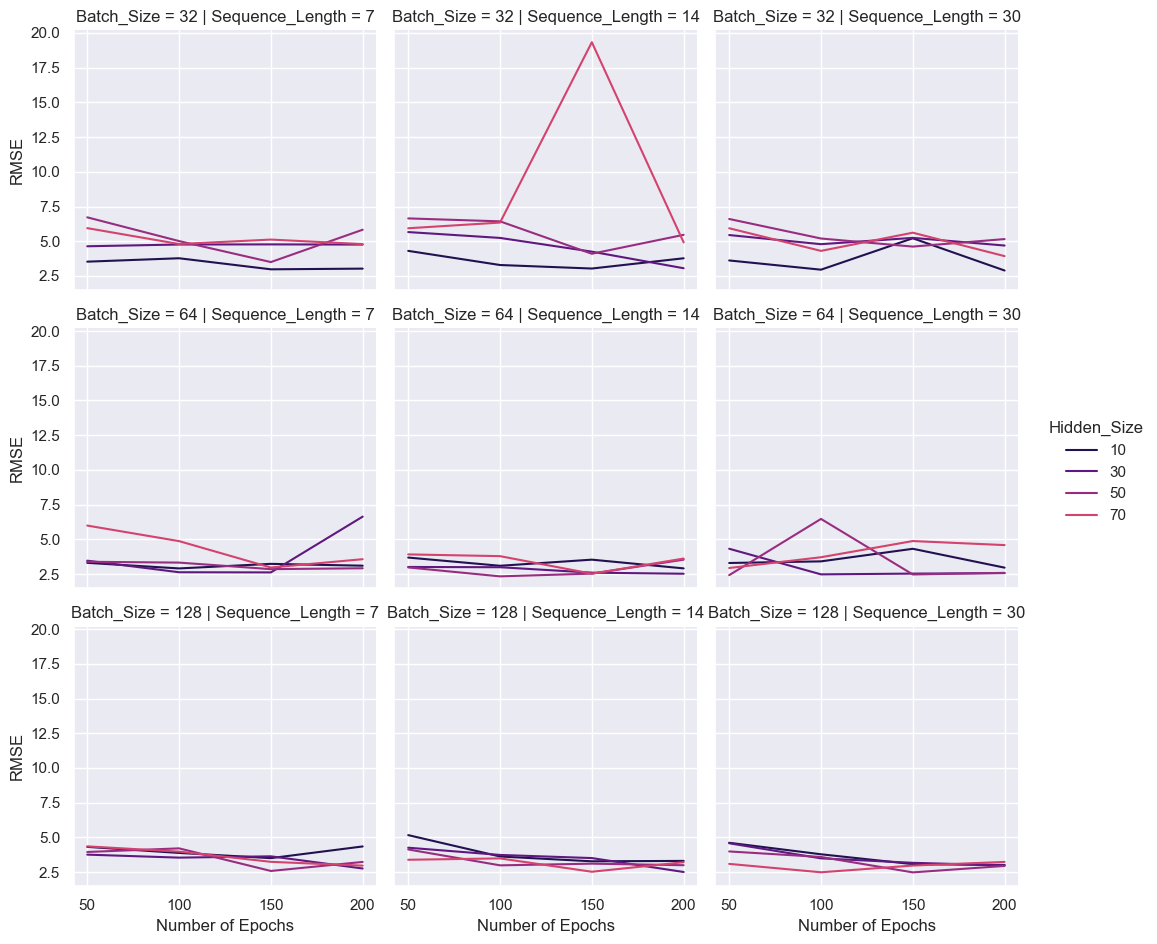

In [9]:
hue_pallete = sns.color_palette("magma")
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="RMSE")
grid.set_axis_labels("Number of Epochs", "RMSE")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\RMSEmulti.png")

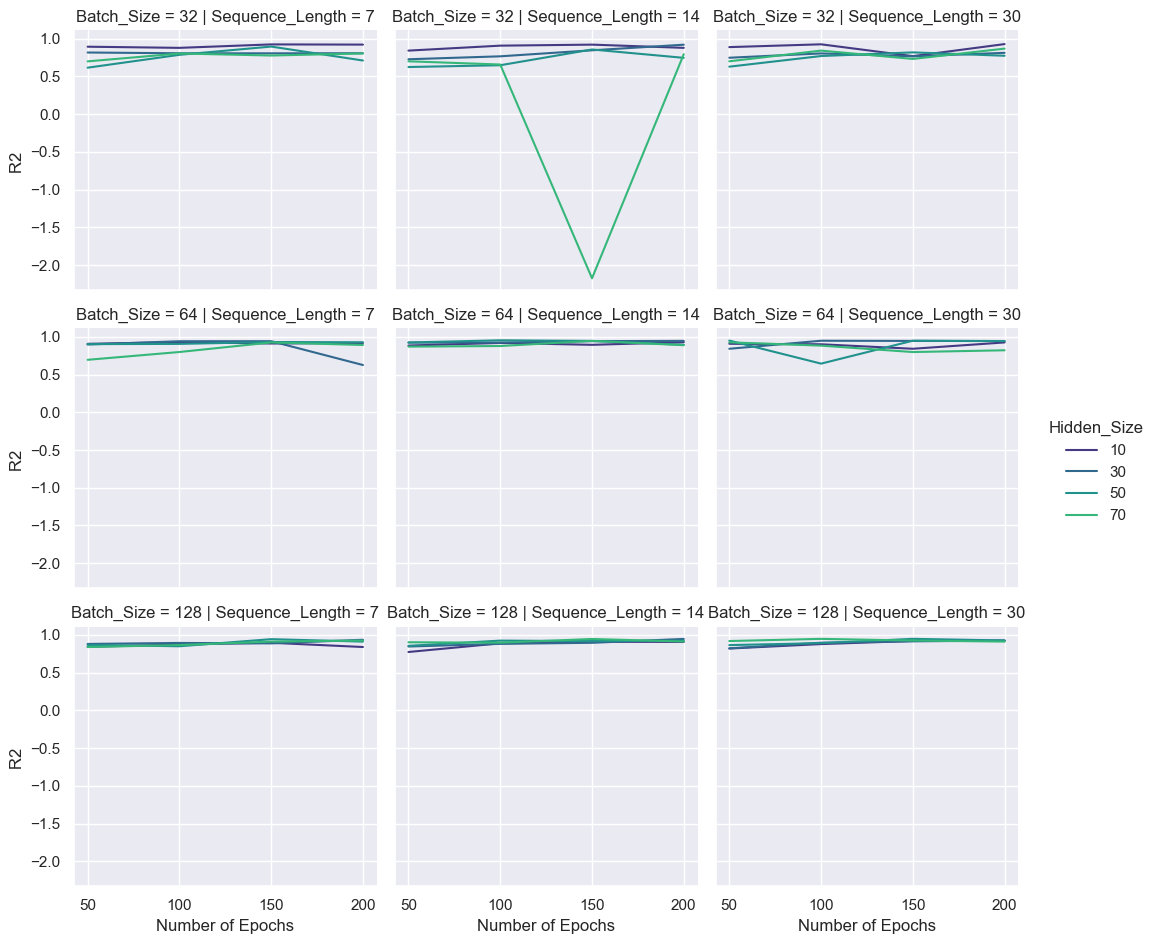

In [10]:
hue_pallete = sns.color_palette("viridis", 5)
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="R2")
grid.set_axis_labels("Number of Epochs", "R2 ")
grid.add_legend()
grid.tight_layout()

if not os.path.exists("images"):
    os.mkdir("images")
    
grid.savefig(r"images\R2multi.png")

#### For the Multilayer LSTM, exclude the batch_size=32 data

In [11]:
multi_df_mod = multi_df[multi_df["Batch_Size"]!=32]

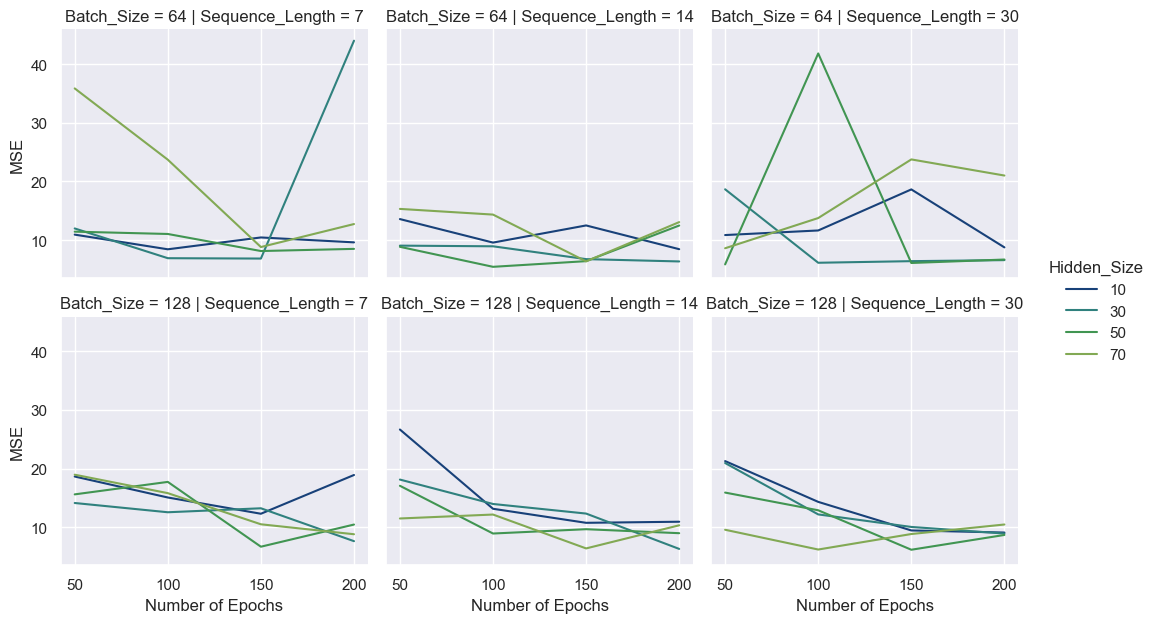

In [12]:
hue_pallete = sns.color_palette("gist_earth")
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df_mod, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="MSE")
grid.set_axis_labels("Number of Epochs", "MSE")
grid.add_legend()
grid.tight_layout()

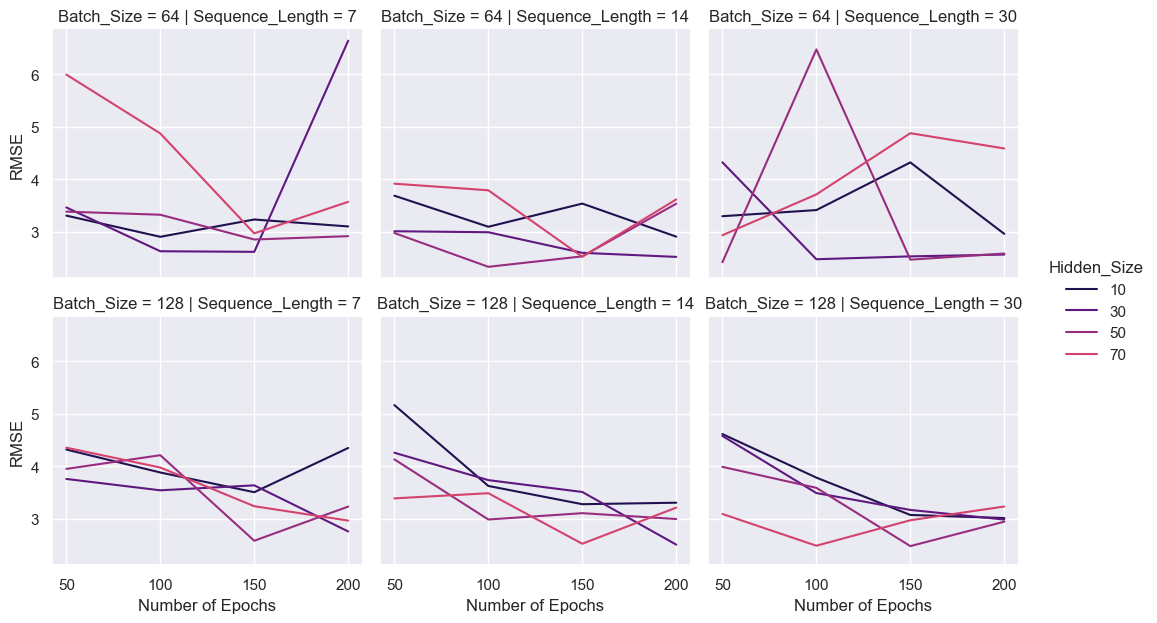

In [13]:
hue_pallete = sns.color_palette("magma")
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df_mod, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="RMSE")
grid.set_axis_labels("Number of Epochs", "RMSE")
grid.add_legend()
grid.tight_layout()

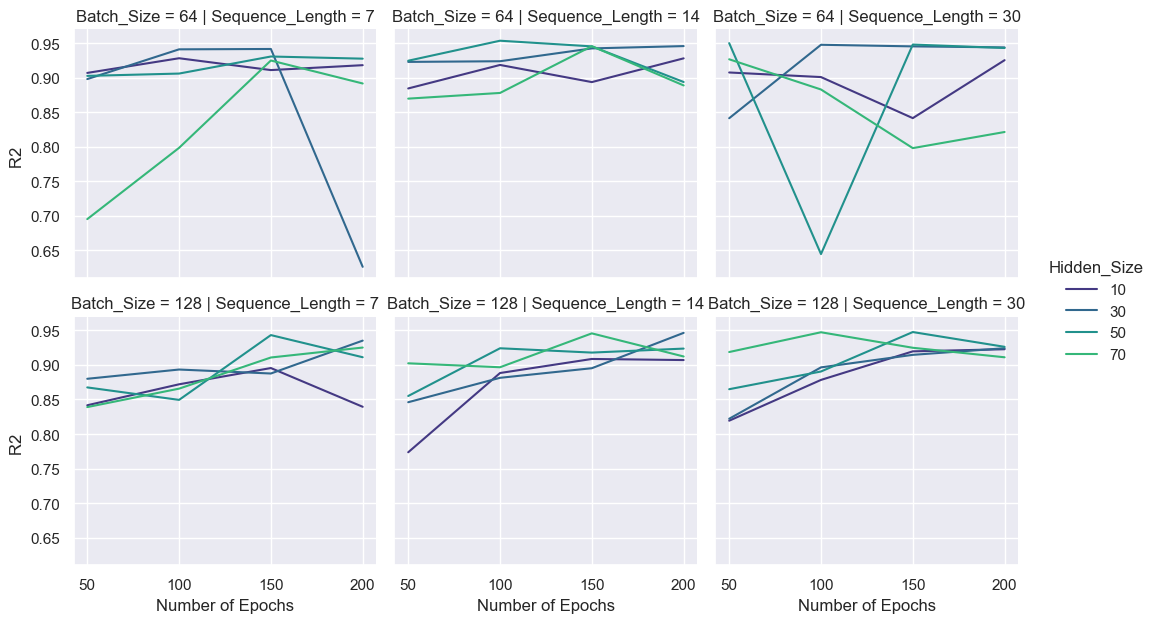

In [14]:
hue_pallete = sns.color_palette("viridis", 5)
sns.set(font_scale= 1)
grid = sns.FacetGrid(multi_df_mod, col="Sequence_Length", row="Batch_Size" , 
                     hue="Hidden_Size", palette = hue_pallete,
                    height =3.2, aspect=1.1)
grid.map_dataframe(sns.lineplot, x="Num_Epochs", y="R2")
grid.set_axis_labels("Number of Epochs", "R2 ")
grid.add_legend()
grid.tight_layout()

### Visualize comparison of single layer and multi layer LSTM results

#### Table of the best model from each model; single layer and multi layer

In [15]:
best_single = single_df.sort_values(by = "R2", ascending=False).iloc[0]
best_multi = multi_df.sort_values(by = "R2", ascending=False).iloc[0]
disp_df = pd.concat([best_single, best_multi], axis=1)
disp_df.columns = ["Single Layer", "Multi Layer"]
disp_df.T

,Sequence_Length,Batch_Size,Hidden_Size,Num_Epochs,MSE,RMSE,R2,execution_time
Single Layer,7.0,64.0,100.0,150.0,4.362564,2.088675,0.962953,35.753417
Multi Layer,14.0,64.0,50.0,100.0,5.436148,2.331555,0.953836,27.968280


#### Prepare data for plotting

In [16]:
seq_s, batch_s, hidden_s, epoch_s, MSE_s, RMSE_s, R2_s, _ = best_single
seq_m, batch_m, hidden_m, epoch_m, MSE_m, RMSE_m, R2_m, _ = best_multi

In [17]:
result_single = single_df[(single_df["Sequence_Length"]==seq_s) & 
                          (single_df["Batch_Size"]==batch_s) & 
                          (single_df["Hidden_Size"]==hidden_s)]
result_single.insert(0, "Model", ["Single Layer LSTM"]*len(result_single))

In [18]:
result_multi = multi_df[(multi_df["Sequence_Length"]==seq_m) & 
                        (multi_df["Batch_Size"]==batch_m) & 
                        (multi_df["Hidden_Size"]==hidden_m)]
result_multi.insert(0, "Model", ["Multi Layer LSTM"]*len(result_multi))

In [19]:
result_df=pd.concat([result_single, result_multi], ignore_index=True)

#### Comparison Single and Multi Layer LSTM

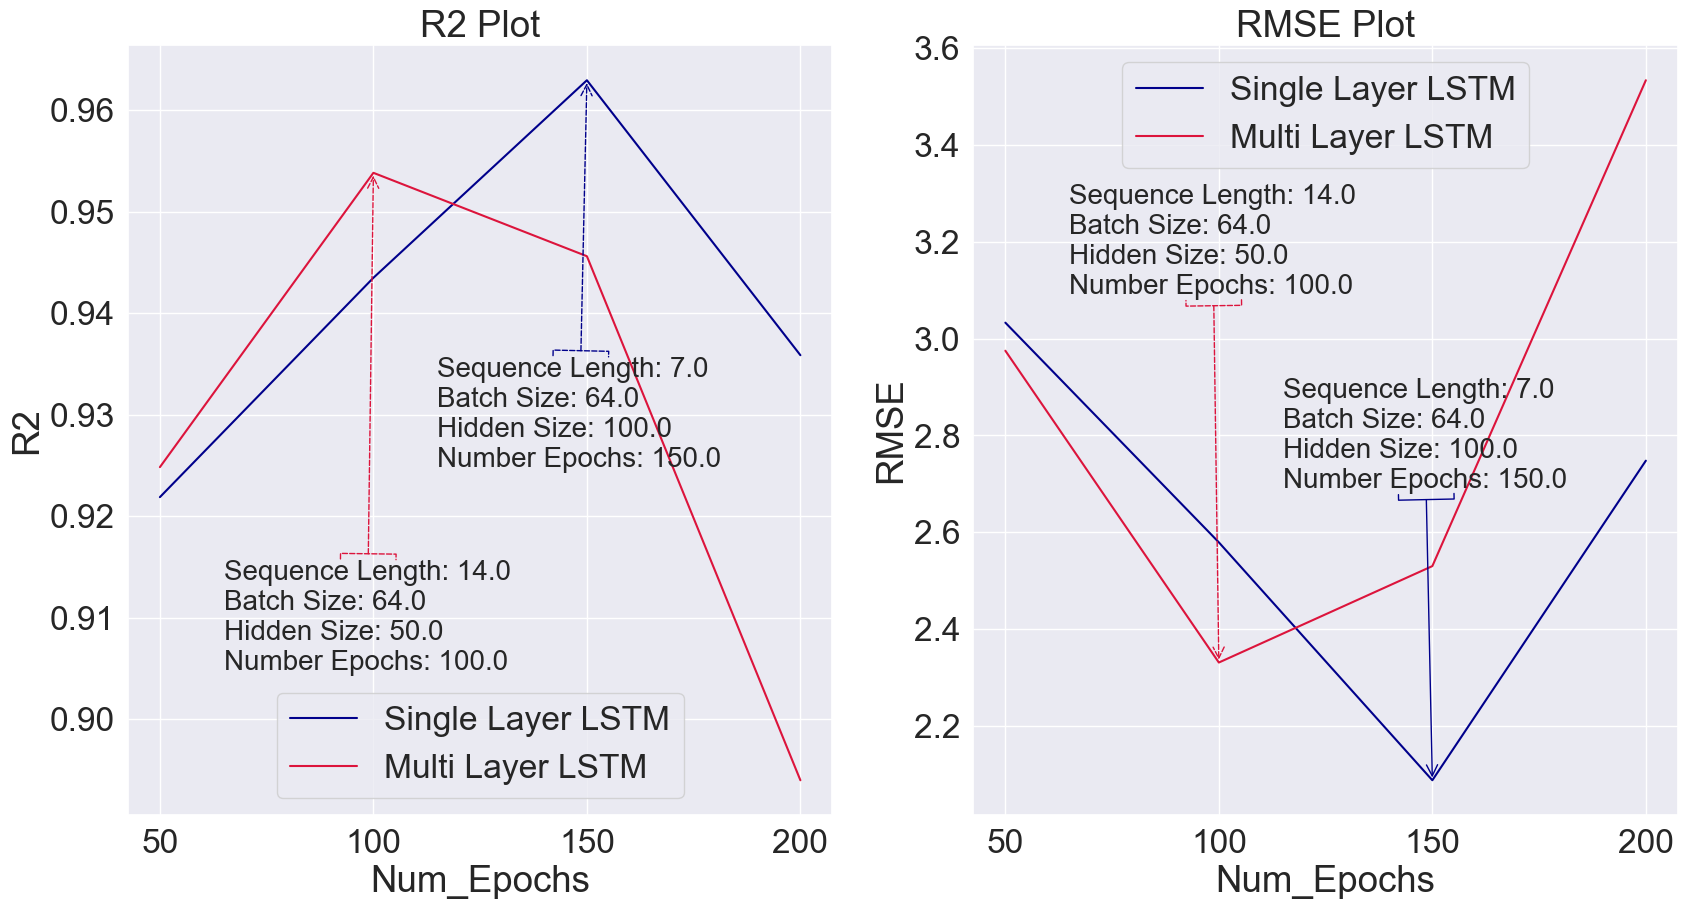

In [80]:
# hue_pallete = sns.color_palette("cool", 2)
hue_pallete = ["darkblue", "crimson"]
# sns.set(font_scale= 2.2)
fig, axes = plt.subplots(1,2, figsize=(20, 10))
annotate_size = 20

sns.lineplot(result_df, x="Num_Epochs", y="R2", 
             hue="Model", palette = hue_pallete, 
             ax=axes[0]).set(title='R2 Plot')
axes[0].legend(loc="lower center")

r2_text=f"Sequence Length: {seq_s}\nBatch Size: {batch_s}\nHidden Size: {hidden_s}\nNumber Epochs: {epoch_s}"
axes[0].annotate(xy =(epoch_s, R2_s), text= r2_text, xytext=(115, 0.93), fontsize=annotate_size,
                 arrowprops={"color":'darkblue', 
                             "arrowstyle": "]->",
                            "linestyle":"--"},
                 va='center'
                )
r2_text=f"Sequence Length: {seq_m}\nBatch Size: {batch_m}\nHidden Size: {hidden_m}\nNumber Epochs: {epoch_m}"
axes[0].annotate(xy =(epoch_m, R2_m), text= r2_text, xytext=(65, 0.91), fontsize=annotate_size,
                 arrowprops={"color":'crimson', 
                             "arrowstyle": "]->",
                            "linestyle":"--"},
                 va='center'
                )



sns.lineplot(result_df, x="Num_Epochs", y="RMSE", 
             hue="Model", palette = hue_pallete, 
             ax=axes[1]).set(title='RMSE Plot')
axes[1].legend(loc="upper center")

rmse_text=f"Sequence Length: {seq_s}\nBatch Size: {batch_s}\nHidden Size: {hidden_s}\nNumber Epochs: {epoch_s}"
axes[1].annotate(xy =(epoch_s, RMSE_s), text= rmse_text, xytext=(115, 2.8), fontsize=annotate_size,
                 arrowprops={"color":'darkblue', 
                             "arrowstyle": "]->"},
                 va='center'
                )
rmse_text=f"Sequence Length: {seq_m}\nBatch Size: {batch_m}\nHidden Size: {hidden_m}\nNumber Epochs: {epoch_m}"
axes[1].annotate(xy =(epoch_m, RMSE_m), text= rmse_text, xytext=(65, 3.2), fontsize=annotate_size,
                 arrowprops={"color":'crimson', 
                             "arrowstyle": "]->",
                            "linestyle":"--"},
                 va='center'
                )



if not os.path.exists("images"):
    os.mkdir("images")
    
fig.savefig(r"images\model_plot.png")